# 29th March 2024

In [1]:
import warnings
from mp_api.client import MPRester
warnings.filterwarnings("ignore")

with open("api.key", "r") as keyFile:
    API_KEY = keyFile.readline().rstrip()

mpr = MPRester(API_KEY)

In [2]:
docs = mpr.summary.search(material_ids=["mp-149", "mp-13", "mp-22526"])

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
example_doc = docs[0]

mpid = example_doc.material_id
formula = example_doc.formula_pretty

In [4]:
list_of_available_fields = mpr.summary.available_fields
print(list_of_available_fields)

['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',

In [5]:
list_of_available_fields

['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'property_name',
 'material_id',
 'deprecated',
 'deprecation_reasons',
 'last_updated',
 'origins',
 'warnings',
 'structure',
 'task_ids',
 'uncorrected_energy_per_atom',
 'energy_per_atom',
 'formation_energy_per_atom',
 'energy_above_hull',
 'is_stable',
 'equilibrium_reaction_energy_per_atom',
 'decomposes_to',
 'xas',
 'grain_boundaries',
 'band_gap',
 'cbm',
 'vbm',
 'efermi',
 'is_gap_direct',
 'is_metal',
 'es_source_calc_id',
 'bandstructure',
 'dos',
 'dos_energy_up',
 'dos_energy_down',
 'is_magnetic',
 'ordering',
 'total_magnetization',
 'total_magnetization_normalized_vol',
 'total_magnetization_normalized_formula_units',
 'num_magnetic_sites',
 'num_unique_magnetic_sites',
 'types_of_magnetic_species',
 'bulk_modulus',
 'shear_modulus',
 'universal_anisotropy',
 'homoge

In [6]:
docs = mpr.molecules.jcesr.search(elements=['H', 'C', 'O'], nelements=(3,3), charge=(0,0))

Retrieving MoleculesDoc documents:   0%|          | 0/1813 [00:00<?, ?it/s]

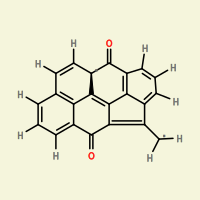

H5C11O:mol-45827


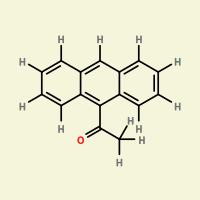

H12C16O:mol-54787


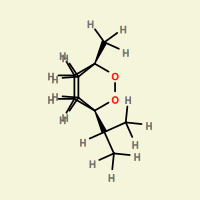

H9C5O:mol-45191


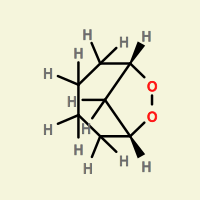

H12C7O2:mol-45261


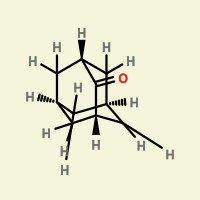

H14C10O:mol-45820


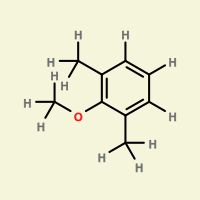

H12C9O:mol-45007


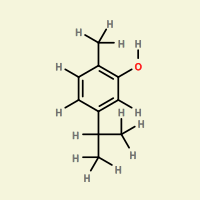

H14C10O:mol-44317


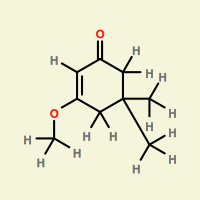

H14C9O2:mol-44766


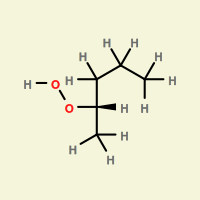

H12C5O2:mol-45231


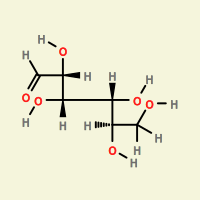

H2CO:mol-26737


In [7]:
from IPython.display import SVG
for doc in docs[:10]:
    formula = doc.formula_pretty
    mpid = doc.task_id
    pic = doc.svg
    display(SVG(doc.svg))
    print(formula+':'+mpid)

In [8]:
from pymatgen.io.ase import AseAtomsAdaptor
from ase import Atoms
import nglview as ngl    

atcol = []
for doc in docs:
    at = Atoms(AseAtomsAdaptor.get_atoms(doc.molecule))
    atcol += [at]
    
ngl.show_ase(atcol[-1])

NGLWidget()

In [9]:
atcol10 = [at for at in atcol if len(at)==10]
atcol15 = [at for at in atcol if len(at)==15]

In [10]:
ngl.show_ase(atcol15[23])

NGLWidget()

In [17]:
ngl.show_ase(atcol10[0])

NGLWidget()

In [12]:
doc.smiles

'C=CC1=COC=C(c2ccccc2)O1'

In [51]:
from ase.build.attach import attach_randomly

liq = attach_randomly(atcol10[0], atcol15[23], 2)
liq.pbc = True
liq.cell = [10,10,10]
liq = attach_randomly(liq, atcol10[0], 2)
liq = attach_randomly(liq, atcol15[23], 2)
liq = attach_randomly(liq, atcol10[0], 2)
liq = attach_randomly(liq, atcol10[0], 2)

from aseMolec import anaAtoms as aa
aa.wrap_molecs([liq], prog=True)
liq.center()

view = ngl.show_ase(liq)
view.add_representation(repr_type='unitcell')
view._set_size(w='100%', h='500px')
view

1


NGLWidget()